<a href="https://colab.research.google.com/github/SebastiaanBekker/practical_python_101/blob/master/Les1_F1_en_Variabelen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Doel

Dit notebook laat zien hoe je python kunt gebruiken om externe data te visaliseren.

https://tinyurl.com/y29dwdk4


**De data die we vandaag gebruiken is de data van FF1, een exerne databron.**

 # Python
## Geschiedenis
Uitgevonden in 1991 door een Nederlander, [Guido van Rossum](https://(https://nl.wikipedia.org/wiki/Guido_van_Rossum)
Gemaakt om programmeren makkelijker te maken. Veel wordt voor je gedaan/bedacht. Dat maakt het soms wel lastiger ;-)
## Waar gebruik je het voor?
Software Applicaties ( web,games,dektop,IOT)
Taak Automatisering - DevOps, maar ook administratie
Data science
Web scraping
## Waarom Python?
Makkelijk te leren, maar ook makkelijk om lastige dingen mee te doen.
Naast de basis is er veel code gemaakt die je kan gebruiken, bijvoorbeeld voor machine learning (zie hieronder)
## Hoe?
- Via de command line (lastig)
- In de browser: Jupyter, Kaggle, Databricks, Anaconda, Google Colab
- Via een IDE (programmeer omgeving): PyCharm, VSCode, Spyder

## De opzet
Iedere week een werkend voorbeeld, met cellen om zelf te proberen/op te lossen/ aan te passen. Zo leer je een beetje wat er kan en welke basis principes er zijn. Veel is het oplosssen van fouten, zodat je snel ziet hoe de code in elkaar zit. Handig in deze chat gpt tijd ;-)

# Deel 1: comments
De computer zal alles wat je neerzet uitvoeren, ongeacht wat er staat. Maar voor mensen is het handig als je uitlegt wat je doet. 

Dat doe je met comments. In python is dat met een #. Alles wat na de # staat wordt niet uitgevoerd. Daarmee kun je ook code even ‘uitzetten’ om iets te testen. Hieronder gebruiken we comments om de code uit te leggen.

In [2]:
# Zoals gezegd, kun je veel code 'ophalen', kijk wel of je de bron vertrouw
# Ophalen doe je met het commando 'import'
# Hieronder laden we code die we nodig hebben om data te tonen van F1.
# in dit geval komt het van deze site: https://docs.fastf1.dev

import pandas as pd
%pip install fastf1 # dit installeert de code in het notebook
import fastf1 as ff1 # dit laadt de code in het notebook

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib as mpl
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.5/113.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.31.0 which is incompatible.


# Deel 2: Definities - kennen! 

De volgende woorden, of definities moet je kennen na en tijdens deze les:

1. parentheses = (  )
2. brackets = [ ]
3. Curly braces = {  }
4. Single quotes = ' '
5. Double quotes = " "

Zoals je zo kunt zien, zijn ze erg belangrijk in python


# Deel 3: Variabelen
Bij het programmeren maken we veel gebruik van “Variables” dit zijn naampjes die iets vasthouden. Per taal zijn er verschillende typen variables genaamd datatypes. In python hebben de volgende standaard datatypes:
- Int/Integer (nummers)
- String (tekst)
- Float (komma getallen)
- List ( een soort lijstje )
- Tuple ( een ander soort lijstje )
- Dictionary ( weer een ander soort lijstje )

### Deel 3 a: Int, String en Float

In [3]:
year = 2022 # dit is een int
wknd = 11 # dit ook
ses = 'R' # dit is een string
driver = 'VER'
colormap = mpl.cm.plasma # en dit is een functie

In [4]:
# Met int kun je rekenen: 

year = year+10
wknd = wknd+1
wknd-1


print(year)
print(f"weekend: {wknd}")
print(f" een float heeft cijfers achter de komma: {wknd/year}")
print (f"Een int niet: {int(wknd/year)}")




2032
weekend: 12
 een float heeft cijfers achter de komma: 0.005905511811023622
Een int niet: 0


In [5]:
# Weer even terugzetten op juiste jaar en weekend voor vervolg:
year = 2022 # dit is een int
wknd = 11 # dit ook

In [19]:
# Met strings kun je niet rekenen: 
driver = driver+1

TypeError: ignored

In [20]:
# Of toch een beetje ;-)
coureur = 'VER'
coureur = coureur+coureur
print(coureur)
coureur= coureur*2
print(coureur)

VERVER
VERVERVERVER


In [21]:
session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /root/.cache/fastf1.
	Size: 24.0 KB

DEFAULT CACHE ENABLED!
	Cache directory: /root/.cache/fastf1.
	Size: 24.0 KB
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.0.4]
INFO:fastf1.fastf1.core:Loading data for Austrian Grand Prix - Race [v3.0.4]
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO

In [22]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

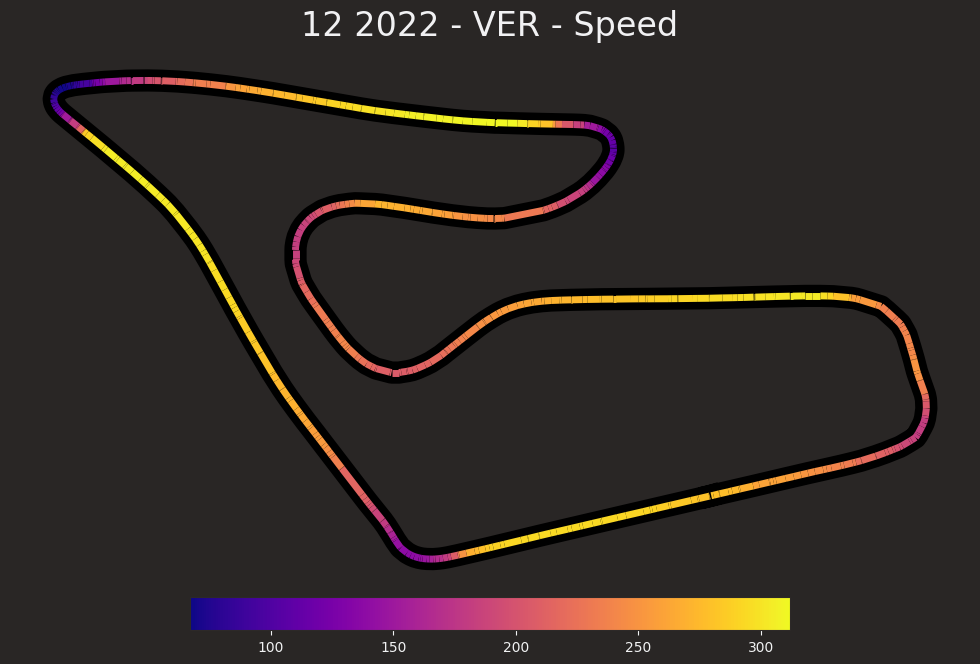

In [23]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")

# Show the plot
plt.show()

### Wat oefeningen 
- Kun je een andere rijder selecteren voor de grafiek? Bijvoorbeeld Hamilton

In [ ]:
driver = 'HAM'

In [24]:
print(lap)

Time                      0 days 02:16:23.223000
Driver                                       VER
DriverNumber                                   1
LapTime                   0 days 00:01:07.275000
LapNumber                                   62.0
Stint                                        4.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:17.144000
Sector2Time               0 days 00:00:29.866000
Sector3Time               0 days 00:00:20.265000
Sector1SessionTime        0 days 02:15:33.092000
Sector2SessionTime        0 days 02:16:02.958000
Sector3SessionTime        0 days 02:16:23.223000
SpeedI1                                    305.0
SpeedI2                                    234.0
SpeedFL                                    276.0
SpeedST                                    312.0
IsPersonalBest                              True
Compound                                  MEDIUM
TyreLife            

In [ ]:
assert lap.Driver == 'HAM', 'De computer leest van boven naar beneden. Je geeft nu de variabele mee als lap al gezet is. Probeer de variabele te vinden en het op te lossen'

### We gaan nu rekenen met de rondetijden tussen 2 rondes en de snelheden
SpeedST (float): Speedtrap on longest straight [km/h]
SpeedI1 (float): Speedtrap sector 1 [km/h]
SpeedI2 (float): Speedtrap sector 2 [km/h]
SpeedFL (float): Speedtrap at finish line [km/h]
SpeedST (float): Speedtrap on longest straight (Not sure) [km/h]

LapTime (pandas.Timedelta): Recorded lap time. Officially deleted lap times will not be deleted here.

Er zijn dus verschillende punten waar de snelheid gemeten wordt. De volgende code maakt voor twee ronden daarvan een aantal variabelen, waar je mee kan rekenen. 

In [26]:
ronde_nummer = 2 # Dit is een string, te zien omdat er geen "" zijn
# Hier halen we de rondetijden en data op 
## eerst de tijden voor twee rondes. 
gegevens_ronde = session.laps.pick_driver(driver).pick_lap(ronde_nummer)
gegevens_ronde_erna = session.laps.pick_driver(driver).pick_lap(ronde_nummer+1) # je kunt dus hier ook nog rekeken

# hier maken we twee lijsten:
te_berekenen_rondes = ['gegevens_ronde', 'gegevens_ronde_erna']
verschillende_meetpunten = ['ST', 'I1','I2','FL']

for ronde in te_berekenen_rondes:
    for meetpunt in verschillende_meetpunten:
        item = ronde + "_" + meetpunt
        exec(f"{item} = float({ronde}['Speed{meetpunt}'])")
        print((item))  # Use eval() to retrieve the value


gegevens_ronde_ST
gegevens_ronde_I1
gegevens_ronde_I2
gegevens_ronde_FL
gegevens_ronde_erna_ST
gegevens_ronde_erna_I1
gegevens_ronde_erna_I2
gegevens_ronde_erna_FL


### Verschil in snelheid

Kun je het verschil in snelheid op de verschillende meetpunten berekenen en in een nieuwe variabele zetten? 
Kun je die optellen en een gemiddelde uitrekenen? 

In [27]:
# Je code hier: 
verschil_ST = 0
verschil_I1 = 0
verschil_I2 = 0
verschil_FL = 0

In [28]:
assert verschil_FL > 0, " Maak een berekening tussen twee variabelen op de plek van de nul" 

AssertionError: ignored

In [29]:
# Hier je gemiddelde
gemiddelde = (4)/4
assert gemiddelde >1, "Vul op de plek van de eerste vier de som in van de variabelen"
print(f"Gemiddelde verschil tussen de vier punten: :{gemiddelde}")

AssertionError: ignored

In [30]:
tijd_ronde = gegevens_ronde.iloc[0]['LapTime']
tijd_ronde_erna = gegevens_ronde_erna.iloc[0]['LapTime']

print(f"De rondetijd van de eerste ronde: {tijd_ronde}")
print(f"De rondetijd van de ronde erna  : {tijd_ronde_erna}")


De rondetijd van de eerste ronde: 0 days 00:01:10.373000
De rondetijd van de ronde erna  : 0 days 00:01:10.165000


In [31]:
## Kun je het vershil tussen de rondetijden berekenen? Een datum/tijd is een getal dat anders wordt weergegeven. Je berekening mag op de plek van de 0
verschil_in_rondetijden = 0

In [32]:
assert verschil_in_rondetijden >0, "Bereken een verschil"

AssertionError: ignored

In [33]:
# Het verschil in rondetijden tussen MAX en HAM is 
ronde1_MAX = 70.373 #60 sec + 10.373 sec.   00:01:10.373000 #  De rondetijd van de eerste ronde 
ronde1_HAM = 72.174 # 00:01:12.174000 # De rondetijd van de eerste ronde 

# Kun je het verschil in rondetijden als float weergeven? 
verschil_ronde1_MAX_HAM = ronde1_HAM - 0

#Als het verschil tussen hen beiden 5 seconden bedraagt, hoe groot is het verschil na 5 ronden? 
verschil_HAM_MAX_ronde6=5

assert verschil_ronde1_MAX_HAM < ronde1_MAX, "Heb je het verschil berekend? "
assert verschil_HAM_MAX_ronde6 > 5, "Vul de formule aan"

AssertionError: ignored

In [34]:
# Wat is het gemiddelde van de rondetijden van HAM en VER? 
gemiddelde_MAX_HAM_ronde1 = 0
assert gemiddelde_MAX_HAM_ronde1 >0, "heb je het gemiddelde?  "

AssertionError: ignored

In [35]:
# Tyrelife is hoeveel rondes de band al gebruikt is. 
#Voor nu is dat de variabele:
Tyrelife_van_de_ronde = gegevens_ronde.iloc[0]['TyreLife']

In [36]:
## als je uitgaat van 20 ronden op een band, hoeveel ronden kan hij nog op deze band? Vul weer in op de plek van de 0

Tyre_ronden_over = 0

In [37]:
assert Tyre_ronden_over > 0, "Vul een berekening in op de plek van de 0"

AssertionError: ignored

In [38]:
# Hij rijdt nu toch langer op deze band, ze denken ongeveer 5 ronden erbij. Hoe verwerk je dat in Tyre_ronden_over? 


In [39]:
assert Tyre_ronden_over >5

AssertionError: ignored

### Nog een paar rekensommen

In [40]:
# Kun je deze twee werkend maken? 

5*"2" # 5 keer 2
print(3*A) # 3 A's achter elkaar



NameError: ignored

## Een andere manier van laten zien van de data (plotten)

In [41]:
import matplotlib.pyplot as plt

import fastf1.plotting


# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

# load a session and its telemetry data
#session = fastf1.get_session(2021, 'Spanish Grand Prix', 'Q')
#session.load()

In [1]:
#session = ff1.get_session(year, wknd, ses)
#session.load()


ver_lap = session.laps.pick_driver('VER').pick_fastest()
ham_lap = session.laps.pick_driver('HAM').pick_fastest()
ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

NameError: ignored

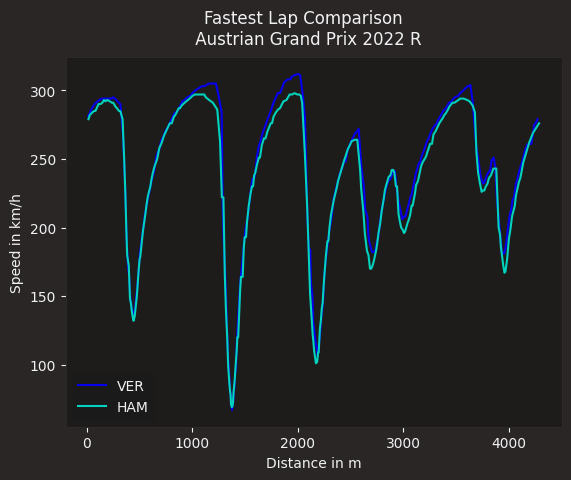

In [44]:
rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MER')

fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='HAM')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} {ses}")

plt.show()


## Herhaling Deel 3a: int, str, float
We hebben drie variabelen besproken aan de hand van de case tot nu toe: 
- ```int``` zijn hele getallen en daarmee kun je rekenen
- ```float``` zijn komma getallen en daarmee kunnen ook berekeningen gemaakt worden
- ```str``` zijn variabelen die een tekst bevatten. Je kunt ze wel 3 keer doen, maar er niet mee rekenenen. Ze staat binnen single of double quotes. 

Oh ja: 

- parentheses = ( )
- brackets = [ ]
- Curly braces = { }
- Single quotes = ' '
- Double quotes = " "


## Deel 3b: Lists, dicts en Tuples
- []: ```List```: Flexibel Je kan er waarden aan toevoegen en verwijderen. Je kan ze sorteren en doorzoeken.
- (): ```Tuple```: Vast Je kan er geen waarden aan toevoegen en verwijderen. Je kan ze niet sorteren en doorzoeken.
- {}: ```Dictionary```: Beschrijving. Je kan er waarden aan toevoegen en verwijderen. Je kan ze sorteren en doorzoeken. Je kan ze ook opzoeken op een bepaalde waarde.


In [74]:
# Dit haalt alle ronden op voor VER
VER_all_laps = (session.laps.pick_driver('VER'))
#en maakt er een list van:
VER_all_laps_list = VER_all_laps['LapTime'].tolist()


## List

In [92]:
print(VER_all_laps_list)

[Timedelta('0 days 00:01:12.722000'), Timedelta('0 days 00:01:10.373000'), Timedelta('0 days 00:01:10.165000'), Timedelta('0 days 00:01:10.128000'), Timedelta('0 days 00:01:10.260000'), Timedelta('0 days 00:01:10.357000'), Timedelta('0 days 00:01:10.559000'), Timedelta('0 days 00:01:10.763000'), Timedelta('0 days 00:01:10.847000'), Timedelta('0 days 00:01:11.396000'), Timedelta('0 days 00:01:10.918000'), Timedelta('0 days 00:01:11.912000'), Timedelta('0 days 00:01:14.194000'), Timedelta('0 days 00:01:27.886000'), Timedelta('0 days 00:01:10.365000'), Timedelta('0 days 00:01:10.024000'), Timedelta('0 days 00:01:10.361000'), Timedelta('0 days 00:01:10.460000'), Timedelta('0 days 00:01:09.895000'), Timedelta('0 days 00:01:09.895000'), Timedelta('0 days 00:01:09.936000'), Timedelta('0 days 00:01:09.846000'), Timedelta('0 days 00:01:10.103000'), Timedelta('0 days 00:01:10.457000'), Timedelta('0 days 00:01:10.715000'), Timedelta('0 days 00:01:10.312000'), Timedelta('0 days 00:01:10.355000'), 

In [93]:
print(VER_all_laps_list[0]) # de eerste ronde


0 days 00:01:12.722000


#Dictionary

In [102]:
banden = {'H':'hard', 'M':'medium', 'S': 'soft'}

In [103]:
print(banden['H'])

hard


## Tuple

In [5]:
# Een Tuple van de rijders voor mercedes:
coureurs = ('HAM', 'BOT','VER') # Normaliter pas je deze in het programma niet meer aan. In een notebook gaat dat natuurlijk wel ;-)

In [94]:
print(coureurs[0])

HAM


In [90]:
snelste_ronde = {}
for rijder in coureurs:
  tijd= session.laps.pick_driver(rijder).pick_fastest()['LapTime']
  snelste_ronde[rijder] = tijd

In [91]:
print(snelste_ronde_per_rijder)

{'HAM': Timedelta('0 days 00:01:09'), 'BOT': Timedelta('0 days 00:01:09.266000'), 'VER': Timedelta('0 days 00:01:07.275000')}


In [3]:
# met append kun je aan een list toevoegen: 
teams= ["Red Bull", "Mercedes", "Ferrari"]
teams.append("Alpha Tauri")

In [6]:
# Maar waarom werkt dit dan niet? 
coureurs.append("GAS")
print(coureurs)

AttributeError: ignored

In [7]:
# aan een dictionary toevoegen is nog makkelijker: 
snelste_ronde["BLA"] = 0
print(snelste_ronde)

NameError: ignored

In [ ]:
#  kun je voor 1 coureur de snelste ronde laten zien? 
